I guess it's time to check that everything is behaving properly :rage:
======================================================================

---

What's the problem?
-------------------

There are two problems at play here: first, the susceptibility values seem to be flipped; second, they the overall behaviour doesn't look right anyway.

What might be the matter?
-------------------------

The reversed susceptibilities suggest that something is flipping the values. There's a minus sign somewhere there souldn't be or something. The overall weird behaviour might be a scaling issue, that's not so clear.

What's the plan?
----------------

We're testing **everything**.

What we need to test:

- `VariableStepNDI`
- `NDIGrad`
- `WeightedSubtract`
- `ConvDipole`

Best of luck :crossed_fingers:

In [2]:
from pathlib import Path

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from QSMLearn.models import VariableStepNDI, NDIGrad
from QSMLearn.layers import WeightedSubtract, ConvDipole

In [6]:
"""Test `WeightedSubtract`.

"""


subtract = WeightedSubtract(tau=2)          # I believe that subtract(x, y) -> x - 2y

x = np.ones([5, 10, 15], dtype=np.float32)
np.all(subtract(x, x) == -x)                # Should return True: x - 2x == -x -> True


True

(256, 256, 256)


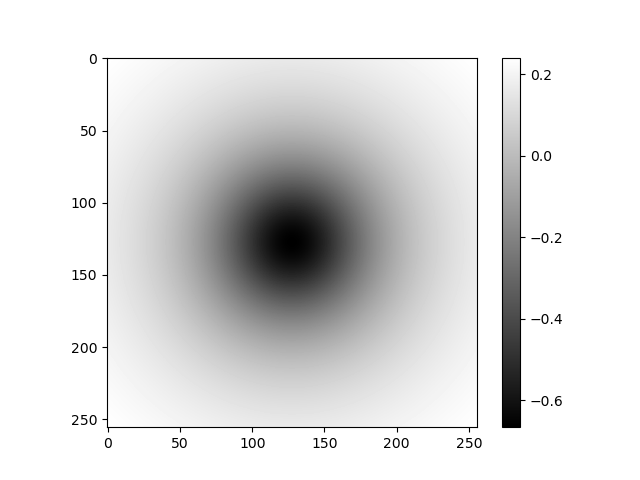

In [9]:
"""Test `ConvDipole`.

`ConvDipole` is supposed to be the operation of convolving with the dipole kernel.
To do this I am applying a Fourier transform, multiplying by the k-space representation 
of the the dipole kernel (d), and applying an inverse Fourier transform.

As such calling a `ConvDiopole` layer on a tensor x should return [D conv x], where D 
is the image-space representation of the diple kernel.

d = 1/3 - k_z^2/k^2

"""

conv = ConvDipole()                         # I believe that conv(x) -> FT^H[d * FT[x]] or equivalently [D conv x]
conv.build(input_shape=[1, 256, 256, 256])  # `input_shape` needs to be [batch_len, x_len, y_len, z_len]
kernel = conv.kernel[0, :, :, :]            # This kernel should be d; the k-space kernel (have removed the batch dim)
kernel = np.fft.fftshift(np.real(kernel))   # Just a bit of cleanup to make it look nice

print(kernel.shape)

plt.figure()
plt.imshow(
    np.flip(kernel[:,:,70]).T,
    cmap='gray'
)
plt.colorbar()
plt.savefig(r'C:\Users\bozth\Documents\UCL\MRes_Project\QSM-ML\notes\images\bad_coronal_slice.png')


In [ ]:
"""Test `NDIGrad`.

"""


In [ ]:
"""Test `VariableStepNDI`.

"""


And we have a winner!!! :tada::tada::tada:
------------------------------------------

Here are the results:

| Component             | Result                |
|----------------------:|:---------------------:|
| `WeightedSubtract`    | :heavy_check_mark:    |
| `ConvDipole`          | :sob:                 |
| `NDIGrad`             | :heavy_check_mark:    |
| `VariableStepNDI`     | :heavy_check_mark:    |

Looks like the dipole kernel is going in the wrong direction... Now all I have to do is fix it.